# **Letter classification algorithm**

## **Number detection with opencv**

Study

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt 
import os
import sys
import time
from scipy import ndimage

In [2]:
# Function to open the camera, take a photo and save the image
#
# Parameters: 
# - image_name: output file name
# - path: path of the destiny folder
#
# Commands: 
# - "s": saves the frame
# - "q" or "esc": close the camera

def take_Photo(image_name, path):
    
    # Verify if the file already exists
    if os.path.isfile(image_name):
        print("The file " + str(image_name) + " already exists! Do you want to overwrite [1], change the file name [2] or exit the program [3]? ")
        answers = ["1", "2", "3"]
        a = 10
        while (a not in answers):
            a = str(input())
            if a == "1":
                print("The image will be overwrite!")
            elif a == "2":
                new_file_name = input("Give the new file name:")
                image_name = new_file_name
            elif a == "3":
                print("The program will be exit!")
                sys.exit()
            else:
                print("Input do not accepted! Try again!")

    # Open the camera
    cap = cv.VideoCapture(0)

    while(True):
        
        # Capture frame-by-frame
        _, frame = cap.read()
        
        # Display the resulting frame
        cv.imshow("Capturing", frame)
    
        key = cv.waitKey(1)
        
        # Save a frame if the user press "s"
        if key == ord('s'): 
            cv.imwrite(path + "\\" + image_name, frame)
            print("Image saved!")
            a = input("Do you want try again? [y/n]")
            if (a == "y") or (a == "Y"):
                print("Try again!")
                pass
            elif (a == "n") or (a == "N"):
                print("Finished!")
                cap.release()
                break
            else:
                print("Finished!")
        # Press "q" or "esc" to close the camera
        elif key == ord('q') or key == 27:
            cap.release()
            cv.destroyAllWindows()
            break

    # When everything done, release the capture
    cap.release()
    cv.destroyAllWindows()

In [6]:
# Function to open the camera, take a photo and save the image
#
# Parameters: 
# - image_name: output file name
# - path: path of the destiny folder
#
# Commands: 
# - "s": saves the frame
# - "q" or "esc": close the camera

name = "z2.jpg"
path = os.getcwd() + "\letters"
take_Photo(name, path)

Image saved!
Do you want try again? [y/n]n
Finished!


In [10]:
# Function to process the input image and returns a image in the format to be compare with the EMNIST database
#
# Parameters:
# - path: where the photo is located 
# - image_name: name of the file
# - show: variable to show the intermediates images created in the processing. 1 -> print images, 0 -> not print

def image_Processing(path, image_name, show):
    
    # read the image (BGR format)
    image = cv.imread(path + "\\" + image_name)
    
    # convert to RGB
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

    # convert to grayscale
    gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
    
    if show == 1:
        print("Printing the source image in gray scale:")
        plt.imshow(gray, cmap="gray")
        plt.show()
        
        # histogram calculation
        print("Printing the gray image's histogram")
        histr = cv.calcHist([gray],[0],None,[256],[0,256])
        plt.plot(histr)
        plt.show()

    # create a binary thresholded image
    _, binary = cv.threshold(gray, 100, 255, cv.THRESH_BINARY_INV)

    if show == 1:
        print("Printing the binary image:")
        plt.imshow(binary, cmap="gray")
        plt.show()
    
    # find the contours from the thresholded image
    contours, hierarchy = cv.findContours(binary, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    
    # calculate the contours' areas
    contours_areas = []
    for cnt in contours:
        contours_areas.append(cv.contourArea(cnt))
        
    # ascending order list
    contours_areas_sorted = np.sort(contours_areas)
    #print(contours_areas_sorted)
    
    # the image captured have two empty spaces, one in the top and another in the bottom,
    # so the two highest areas values is due to these spaces
    best_cnt_area = contours_areas_sorted[-3]
    #print(best_cnt_area)
    
    best_cnt = contours[contours_areas.index(best_cnt_area)]
    #print(cv.contourArea(best_cnt))

    # compute the bounding box
    (x, y, w, h) = cv.boundingRect(best_cnt)

    # affiche les rectangles sur l'image binaire
    #cv.rectangle(binary, (x,y), (x+w,y+h), (255,255,0), 2) 

    # extract the region of interest (ROI) using the informations of the bounding box
    diceROI = binary[y-40 : y+h+40, x-40 : x+w+40] 
    
    if show == 1:
        print("Printing the region of intest:")
        plt.imshow(diceROI, cmap="gray")
        plt.show()

    # calculate the center of mass, the height and the width of the ROI
    centre_h, centre_w = ndimage.measurements.center_of_mass(diceROI)
    h, w = diceROI.shape
    
    # if image superior to standard (28x28)
    resized_image = []
    if h or w > 28 :
        resized_image = cv.resize(diceROI,(28,28),interpolation=cv.INTER_AREA)
        if show == 1:
            print("Printing the resized image:")
            plt.imshow(resized_image, cmap="gray")
            plt.show()

    # apply a threshold again because the resize change the binary image
    _, binary2 = cv.threshold(resized_image, 50, 255, cv.THRESH_BINARY)
    
    if show == 1:
        print("Printing the image after the second binarization:")
        plt.imshow(binary2, cmap="gray")
        plt.show()

    # apply a dilation to make lines more visiable
    kernel = np.ones((2,2),np.uint8)
    dilation = cv.dilate(binary2,kernel,iterations = 1) 
    
    return dilation

Printing the new image to test:


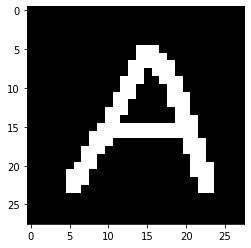

In [11]:
# Function to process the input image and returns a image in the format to be compare with the EMNIST database
#
# Parameters:
# - path: where the photo is located 
# - image_name: name of the file
# - show: variable to show the intermediates images created in the processing. 1 -> print images, 0 -> not print

new_image = image_Processing(os.getcwd(), "pape.jpg", 0)

print("Printing the new image to test:")
plt.imshow(new_image, cmap="gray")
plt.show()

In [160]:
# Link the image source to the corresponding target
#
# Parameters:
# - position: position of the photo in the name_list list
# - name_list: list with all the names of the photos in the folder "letters"

def get_target(position, name_list):
    
    lowercase = 'abcdefghijklmnopqrstuvwxyz'
    uppercase = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    
    photo_name = name_list[position]
    letter = photo_name[0]
    
    if (letter in lowercase):
        target = lowercase.index(letter) + 1
    elif (letter in uppercase):
        target = uppercase.index(letter) + 1
    else:
        target = 0
    
    return target

In [161]:
# Function to create a test data set using the photos in the "letters" folder and to return the data set loaded
#
# Parameters:
# - file_dataset: name of the npy file

def create_test_dataset(file_dataset):

    letters_path = os.getcwd() + "\letters"

    # list to store the name of all the images in the folder "letters"
    image_name_list = []
    for photo_name in os.listdir(letters_path):
        image_name_list.append(photo_name)

    # list to store the results after the image_processing
    images_processed = []
    for img in image_name_list:
        images_processed.append(image_Processing(letters_path, img, 0))

    #print(type(images_processed[0])) #<class 'numpy.ndarray'>

    # convert the numpy array to one line where the last column is the target
    lines_list = []
    pos = 0

    for i in images_processed:
        line = i.reshape(-1).tolist() # array to list and transform the matrix to 1 line with 784 columns
        target = get_target(pos, image_name_list)
        pos = pos +  1
        line.append(target) # add the template
        lines_list.append(np.asarray(line)) # list to array

    # save the file
    if os.path.isfile(file_dataset + ".npy"):
        print("The file " + str(file_dataset) + " already exists! Do you want to overwrite [1], change the file name [2] or exit the program [3]? ")
        a = str(input())
        if a == "1":
            print("The file will be overwrite!")
        elif a == "2":
            new_file_name = input("Give the new file name:")
            file_dataset = new_file_name
        elif a == "3":
            print("The program will be exit!")
            sys.exit()
        else:
            print("Input do not accepted! Try again!")
            sys.exit()
    
    np.save(file_dataset, lines_list)
    print("The test data set was created!")

    dataset = np.load('test_photo_dataset.npy')
    
    return dataset


In [163]:
# Function to create a test data set using the photos in the "letters" folder and to return the data set loaded
#
# Parameters:
# - file_dataset: name of the npy file

dataset = create_test_dataset("test_photo_dataset")

The file test_photo_dataset already exists! Do you want to overwrite [1], change the file name [2] or exit the program [3]? 
1
The file will be overwrite!
The test data set was created!


## Test ##

In [73]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv

sys.path.append('../src')
#from ocr.helpers import implt, resize, ratio

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 5.0)

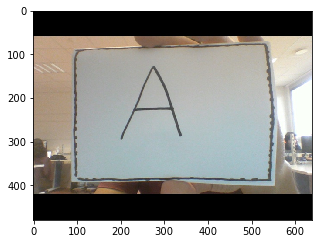

In [74]:
# Loading images and ploting it (converting to RGB from BGR)
image = cv.imread("paper2.jpg")

# convert RGB to RGB
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image, cmap="gray")
plt.show()

In [75]:
def edges_det(img, min_val, max_val, show):
    """ Preprocessing (gray, thresh, filter, border) + Canny edge detection """
    #img = cv2.cvtColor(resize(img), cv2.COLOR_BGR2GRAY)
    img = cv.cvtColor((img), cv.COLOR_BGR2GRAY)
    #plt.imshow(img, cmap="gray")
    #plt.show()

    # Applying blur and threshold
    #img = cv.bilateralFilter(img, 9, 75, 75)
    #img = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 115, 4)
    #implt(img, 'gray', 'Adaptive Threshold')
    
    # Apply filter (blur) : noise removal while keeping edges sharp
    img = cv.bilateralFilter(img, 9, 75, 75) # default values
    if show == 1:
        print("Printing bilateral filter (blur)")
        plt.imshow(img, cmap="gray")
        plt.show()

    # Apply adaptive threshold : different threshold values for different regions
    img = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 115, 4)
    if show == 1:
        print("Printing adaptive threshold")
        plt.imshow(img, cmap="gray")
        plt.show()

    # Median blur replace center pixel by median of pixels under kelner
    # => removes thin details
    #img = cv2.medianBlur(img, 11)
    
    # Highly effective in removing salt-and-pepper noise
    img = cv.medianBlur(img, 11)
    if show == 1:
        print("Printing median blur")
        plt.imshow(img, cmap="gray")
        plt.show()

    # Add black border - detection of border touching pages
    # Contour can't touch side of image
    #img = cv2.copyMakeBorder(img, 5, 5, 5, 5, cv2.BORDER_CONSTANT, value=[0, 0, 0])
    #implt(img, 'gray', 'Median Blur + Border')
    
    # Create a border around the image like a photo frame
    img = cv.copyMakeBorder(img, 5, 5, 5, 5, cv2.BORDER_CONSTANT, value=[0, 0, 0])
    if show == 1:
        print("Printing border around the images")
        plt.imshow(img, cmap="gray")
        plt.show()

    return cv.Canny(img, min_val, max_val)

Printing after edge detection


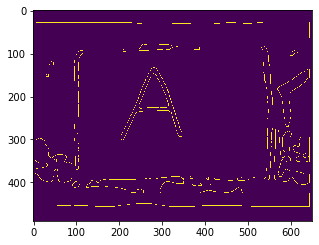

Testing after close gaps


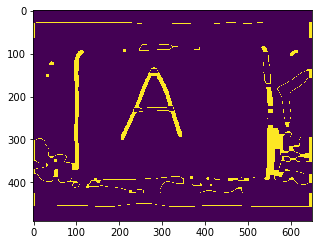

In [77]:
# Edge detection ()
edges_image = edges_det(image, 200, 250, 0)

print("Printing after edge detection")
plt.imshow(edges_image)
plt.show()

# Close gaps between edges (double page clouse => rectangle kernel)
#edges_image = cv2.morphologyEx(edges_image, cv2.MORPH_CLOSE, np.ones((5, 11)))
#implt(edges_image, 'gray', 'Edges')

print("Testing after close gaps")
edges_image = cv.morphologyEx(edges_image, cv.MORPH_CLOSE, np.ones((5, 11)))
plt.imshow(edges_image)
plt.show()


In [84]:
def four_corners_sort(pts):
    """ Sort corners: top-left, bot-left, bot-right, top-right"""
    diff = np.diff(pts, axis=1)
    summ = pts.sum(axis=1)
    return np.array([pts[np.argmin(summ)],
                     pts[np.argmax(diff)],
                     pts[np.argmax(summ)],
                     pts[np.argmin(diff)]])


def contour_offset(cnt, offset):
    """ Offset contour because of 5px border """
    cnt += offset
    cnt[cnt < 0] = 0
    return cnt


def find_page_contours(edges, img):
    """ Finding corner points of page contour """
    # Getting contours  
    contours, hierarchy = cv.findContours(edges, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    
    # Finding biggest rectangle otherwise return original corners
    height = edges.shape[0]
    width = edges.shape[1]
    MIN_COUNTOUR_AREA = height * width * 0.5
    MAX_COUNTOUR_AREA = (width - 10) * (height - 10)

    max_area = MIN_COUNTOUR_AREA
    page_contour = np.array([[0, 0],
                            [0, height-5],
                            [width-5, height-5],
                            [width-5, 0]])
    
    for cnt in contours:
        perimeter = cv.arcLength(cnt, True)
        approx = cv.approxPolyDP(cnt, 0.03 * perimeter, True)

        # Page has 4 corners and it is convex
        if (len(approx) == 4 and
                cv.isContourConvex(approx) and
                max_area < cv.contourArea(approx) < MAX_COUNTOUR_AREA):
            
            max_area = cv.contourArea(approx)
            page_contour = approx[:, 0]

    # Sort corners and offset them
    page_contour = four_corners_sort(page_contour)
    return contour_offset(page_contour, (-5, -5))

ValueError: shapes (4,2) and (480,640,3) not aligned: 2 (dim 1) != 640 (dim 1)

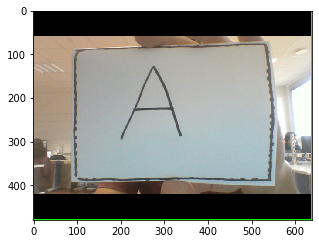

In [89]:
page_contour = find_page_contours(edges_image, image)
#print("PAGE CONTOUR:")
#print(page_contour)
#implt(cv2.drawContours(image, [page_contour], -1, (0, 255, 0), 3))
image = cv.drawContours(image, [page_contour], -1, (0, 255, 0), 3)
plt.imshow(image)

       
# Recalculate to original scale
page_contour = page_contour.dot(image)

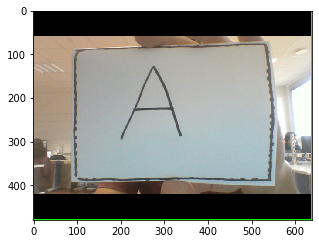

In [90]:
def persp_transform(img, s_points):
    """ Transform perspective from start points to target points """
    # Euclidean distance - calculate maximum height and width
    height = max(np.linalg.norm(s_points[0] - s_points[1]),
                 np.linalg.norm(s_points[2] - s_points[3]))
    width = max(np.linalg.norm(s_points[1] - s_points[2]),
                 np.linalg.norm(s_points[3] - s_points[0]))
    
    # Create target points
    t_points = np.array([[0, 0],
                        [0, height],
                        [width, height],
                        [width, 0]], np.float32)
    
    # getPerspectiveTransform() needs float32
    if s_points.dtype != np.float32:
        s_points = s_points.astype(np.float32)
    
    M = cv2.getPerspectiveTransform(s_points, t_points) 
    return cv2.warpPerspective(img, M, (int(width), int(height)))
    
    
newImage = persp_transform(image, page_contour)
#implt(newImage, t='Result')
plt.imshow(newImage)
plt.show()

In [114]:
x = [[1, 2, 3], [4, 5, 6]]
print(type(x))
x_array = np.asarray(x)
print(type(x_array))
x_array.ravel()

<class 'list'>
<class 'numpy.ndarray'>


array([1, 2, 3, 4, 5, 6])

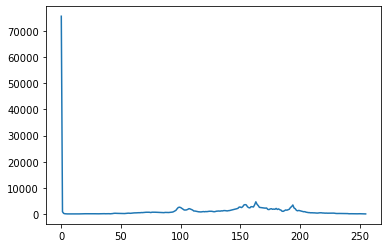

In [150]:
# STUDY ABOUT HISTOGRAM ANALYSYS

# load the image in grayscale mode
image = cv.imread("paper.jpg", 0)

# plot the image
#plt.imshow(image, cmap="gray")
#plt.show()

# creating histogram using numpy array
#plt.hist(image.ravel(), bins=256, range=(0.0, 255.0), fc='k', ec='k') #calculating histogram

# histogram calculation
histr = cv.calcHist([image],[0],None,[256],[0,256])
plt.plot(histr)
plt.show()

## **R A S C U N H O**

In [359]:
import csv
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import itertools
from sklearn.metrics import confusion_matrix

In [360]:
import cv2 as cv
import numpy as np
import os

In [183]:
cap = cv.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    blurred_frame = cv.GaussianBlur(frame, (5, 5), 0)

    # hsv conversion
    hsv = cv.cvtColor(blurred_frame, cv.COLOR_BGR2HSV)
    
    # hsv ranges
    lower_blue = np.array([38, 86, 0])
    upper_blue = np.array([121, 255, 255])
    mask = cv.inRange(hsv, lower_blue, upper_blue)
    
    # Display the resulting frame
    cv.imshow('frame', frame)
    
    # gray conversion
    imgray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    
    # find the contours
    ret, thresh = cv.threshold(imgray, 127, 255, 0)
    contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    
    #if len(contours) > 0:
    #for c in contours: 
        #maxCountour = max(contours, key=cv.contourArea)
     #   x, y, w, h = cv.boundingRect(c)
    #    cv.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    if len(contours) > 0:
        countourMax = max(contours, key=cv.contourArea)
        cv.drawContours(imgray, countourMax, -1, (0, 255, 0), 3)
    
    #cv.imshow("mask", mask)
    cv.imshow("gray", imgray)
    
    # conditions to close the camera
    key = cv.waitKey(1)
    if key == 27: # esc
        break
    #if cv.waitKey(1) & 0xFF == ord('q'):
    #    break

# When everything done, release the capture
cap.release()
cv.destroyAllWindows()

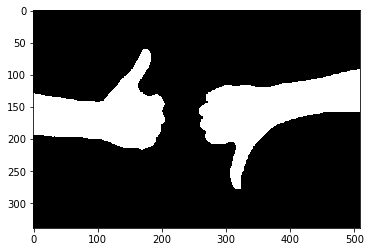

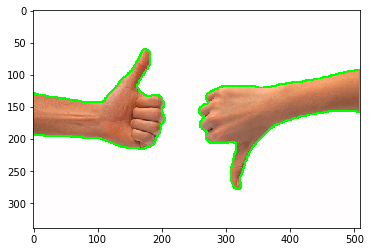

In [182]:
# read the image
image = cv.imread("thumbs_up_down.jpg")

# convert to RGB
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# convert to grayscale
gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)

# create a binary thresholded image
_, binary = cv.threshold(gray, 225, 255, cv.THRESH_BINARY_INV)

# show it
plt.imshow(binary, cmap="gray")
plt.show()

# find the contours from the thresholded image
contours, hierarchy = cv.findContours(binary, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# draw all contours
image = cv.drawContours(image, contours, -1, (0, 255, 0), 2)

# show the image with the drawn contours
plt.imshow(image)
plt.show()

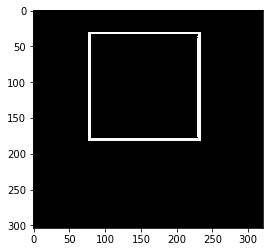

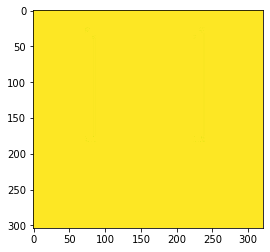

It's a rectangle
It's a rectangle


'        \ncv.imshow("shapes", img)\ncv.imshow("Threshold", threshold)\ncv.waitKey(0)\ncv.destroyAllWindows()\n'

In [47]:
font = cv.FONT_HERSHEY_COMPLEX

# read the image
img = cv.imread("square.jpg", cv.IMREAD_GRAYSCALE)

# create a thresholded image
_, threshold = cv.threshold(img, 240, 255, cv.THRESH_BINARY_INV)

# show it
plt.imshow(threshold, cmap="gray")
plt.show()

# find the contours from the thresholded image
contours, hierarchy = cv.findContours(threshold, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# draw all contours
img = cv.drawContours(img, contours, -1, (255, 255, 0), 2)

# show the image with the drawn contours
plt.imshow(img)
plt.show()


for cnt in contours:
    # approximate the contours to remove the noise
    approx = cv.approxPolyDP(cnt, 0.01*cv.arcLength(cnt, True), True)
    
    #cv.drawContours(img, [approx], 0, (0), 5)
    
    x = approx.ravel()[0]
    y = approx.ravel()[1]
    
    if len(approx) == 4:
        print("It's a rectangle")
    else:
        print("Shape not recognized")
    
'''
for cnt in contours:
    
    # approximate the contours to remove the noise
    approx = cv.approxPolyDP(cnt, 0.01*cv.arcLength(cnt, True), True)
    
    #cv.drawContours(img, [approx], 0, (0), 5)
    
    x = approx.ravel()[0]
    y = approx.ravel()[1]
    
    if len(approx) == 3:
        #cv.putText(img, "Triangle", (x, y), font, 1, (0))
    elif len(approx) == 4:
        #cv.putText(img, "Rectangle", (x, y), font, 1, (0))
    elif len(approx) == 5:
        #cv.putText(img, "Pentagon", (x, y), font, 1, (0))
    elif 6 < len(approx) < 15:
        #cv.putText(img, "Ellipse", (x, y), font, 1, (0))
    else:
        #cv.putText(img, "Circle", (x, y), font, 1, (0))
'''
'''        
cv.imshow("shapes", img)
cv.imshow("Threshold", threshold)
cv.waitKey(0)
cv.destroyAllWindows()
'''

In [44]:
cap = cv.VideoCapture(0)

while True:

    ret, frame = cap.read()
    #print(ret) #prints true as long as the webcam is running
    #print(frame) #prints matrix values of each framecd 
    
    cv.imshow("Capturing", frame)
    key = cv.waitKey(1)
    
    if key == ord('s'): 
        cv.imwrite(filename='saved_imgoioi.jpg', img=frame)
        cap.release()
        
        #print("Processing image...")
        img_ = cv.imread('saved_imgoioi.jpg', cv.IMREAD_ANYCOLOR)
        
        #print("Converting RGB image to grayscale...")
        gray = cv.cvtColor(img_, cv.COLOR_BGR2GRAY)
        #print("Converted RGB image to grayscale...")
        
        #print("Resizing image to 28x28 scale...")
        #img_ = cv.resize(gray,(28,28))
        #print("Resized...")
        
        #img_resized = cv.imwrite(filename='saved_img-final.jpg', img=img_)
        print("Image saved!")
        break

    elif key == ord('q') or key == 27:
        cap.release()
        cv.destroyAllWindows()
        break

cap.release()
cv.destroyAllWindows()

KeyboardInterrupt: 

In [45]:
cap.release()
cv.destroyAllWindows()

In [ ]:
img = cv.imread("saved_img.jpg", cv.IMREAD_GRAYSCALE)

plt.imshow(img, cmap="gray")
plt.show()

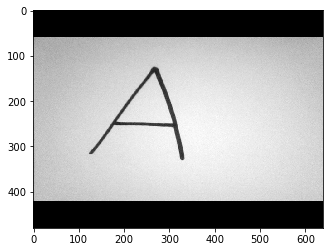

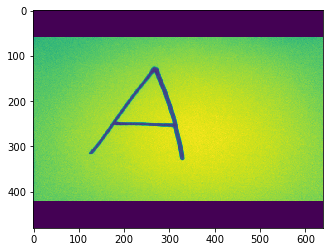

263
Rectangle recognized


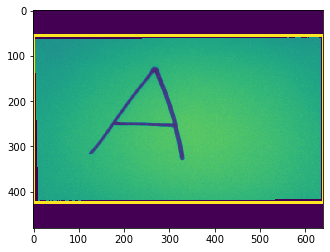

In [35]:
img = cv.imread("saved_img.jpg", cv.IMREAD_GRAYSCALE)

plt.imshow(img, cmap="gray")
plt.show()

# find the contours from the thresholded image
contours, hierarchy = cv.findContours(img, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# show the image with the drawn contours
plt.imshow(img)
plt.show()

print(len(contours))

for cnt in contours:
    
    # approximate the contours to remove the noise
    approx = cv.approxPolyDP(cnt, 0.01*cv.arcLength(cnt, True), True)
    cv.drawContours(img, [approx], 0, (0), 5)
    
    # calcul de la zone des contours
    area = cv.contourArea(cnt)
    #print(area)
    
    x = approx.ravel()[0]
    y = approx.ravel()[1]
    
    if len(approx) == 4 and area > 10000:
        print("Rectangle recognized")
        
        # compute the bounding box where (x,y) is the top-left coordinate of the rectangle 
        # and (w,h) is the width and height
        (x, y, w, h) = cv.boundingRect(cnt) # calcul de coordonnes de la zone
        #print(x, y, w, h)
        
        # affiche les rectangles sur l'image
        img = cv.rectangle(img, (x,y), (x+w,y+h), (255,255,255), 5) 
        plt.imshow(img)
        plt.show()
    
        # extract the region of interest (ROI) using the informations of the bounding box
        #diceROI = img[y-2 : y+h+2, x-2 : x+w+2] # extraction de la zone sur l'image   
        #diceROI = img[50:550, 50:400]
        #plt.matshow(diceROI, cmap="gray")
        
        break


## **FIM DE RASCUNHO**